# Netflix Exploratory Data Analysis

This notebook, I'll give EDA from **Netflix Data Set** from **kaggle**

--**STEPS**--
1. Basic Data Exploration
   1. Import Packages and Load Data
   2. Feature Exploration
   3. Summary Statistics
2. Data Cleaning
   1. Null Value Analysis
   2. Dublicate Value Analysis
   3. Outlier Analysis
3. Exploratory data analysis (Answering questions we have of the data) 
   1. Close look at the data in the dataset (with agg)
   2. What is the Story Of Data
4. ML Modeling
   1. Label Encoding
   2. Linear Regression Model


## Basic Data Exploration
1. Import Packages and load Data
2. Feature Exploration
3. Summary Statistics

#### Importing Libraries and Loading the Dataset

In [1]:
# Import Relevant Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'pandas'

In [3]:
# Set some Options
# ensure that all columns will be displayed in their entirety when printing a DataFrame.
pd.set_option("display.max_columns", None)
# set the display width to 500 characters
pd.set_option("display.width", 500)

In [4]:
# Load Data set
df = pd.read_csv('data_sets/netflix_titles.csv')

#### Feature Exploration

In [4]:
# First 5 Data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'], dtype='object')

In [6]:
df.shape

(8807, 12)

* We have 8807 Entity from 12 Feature

In [7]:
# Data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We Have:
* 11 Categorical Feature
* 1 Numeric Feature

#### Summary Statistics

In [8]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include='number')
# We have only 'release_year' as a numeric feature
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [9]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include='object')
categorical_features.describe().T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


## Data Cleaning
1. Null Value Analysis
2. Checking Dublicate Values
3. Outlier Analysis

#### Null Value Analysis

In [10]:
# Is there any null value in dataset
df.isnull().values.any()

True

<Axes: >

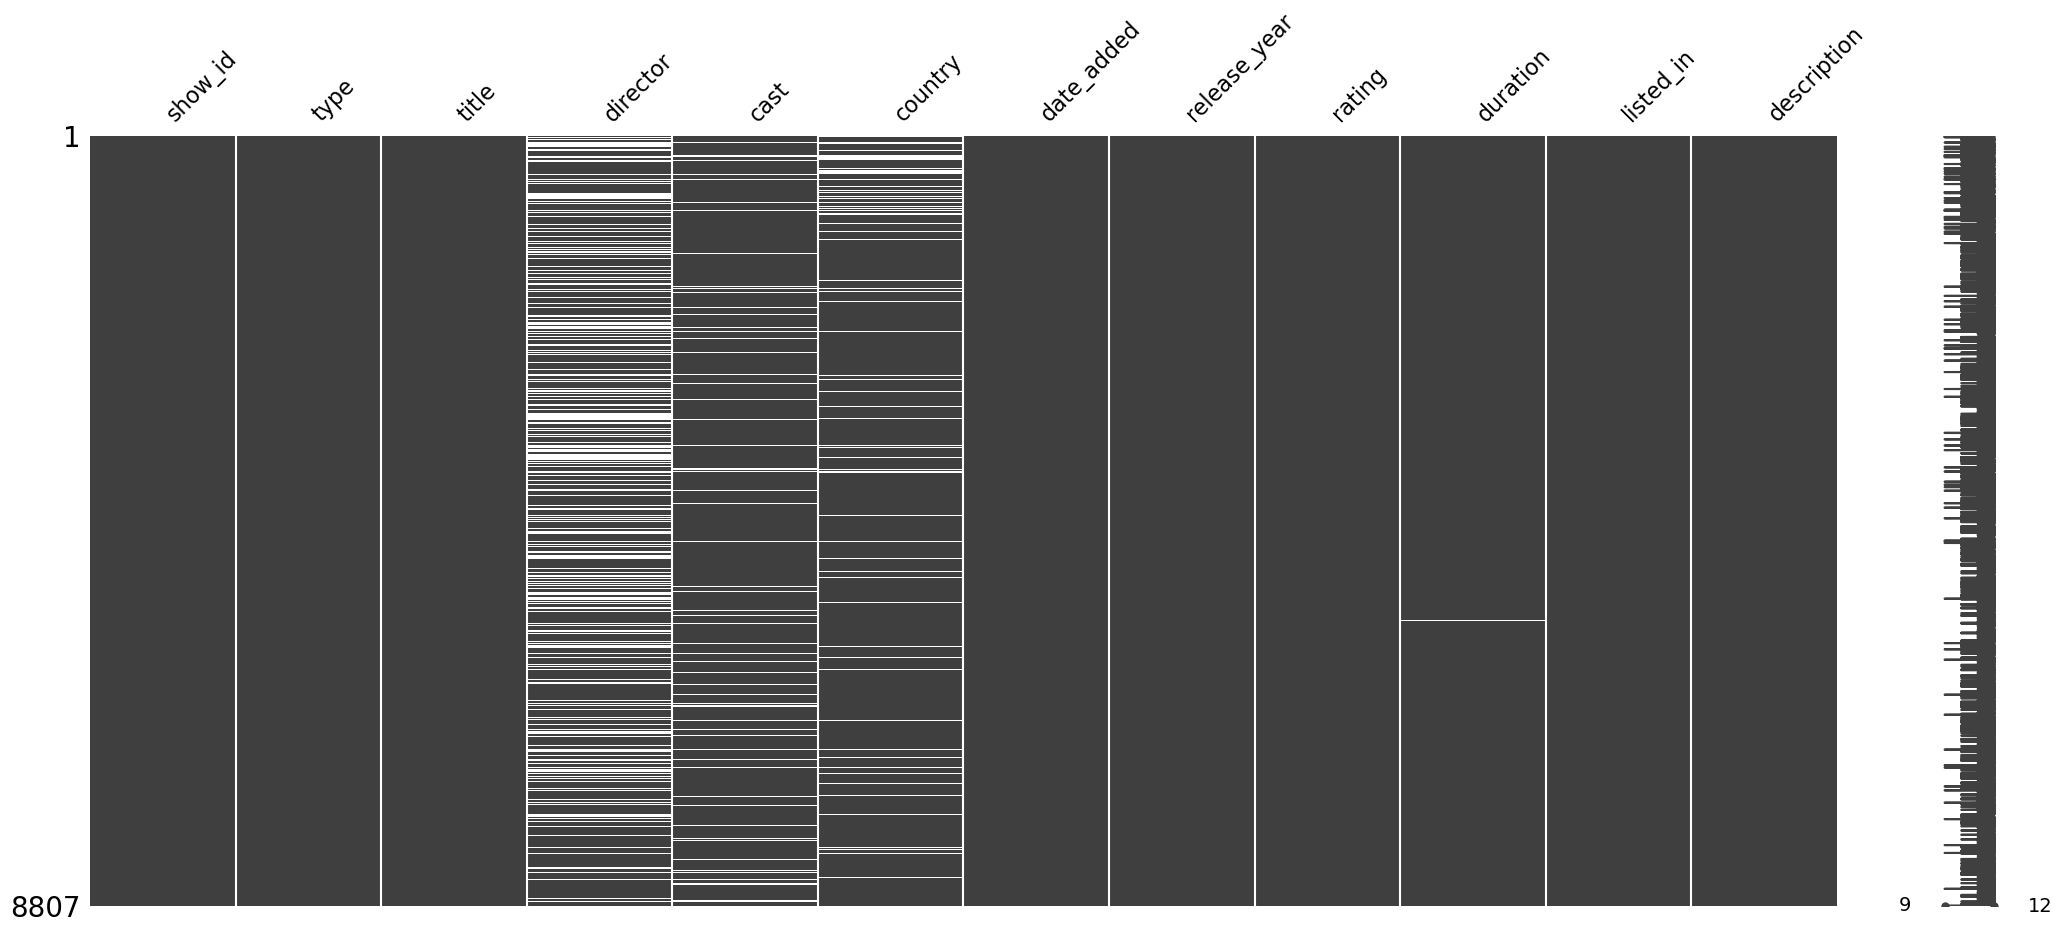

In [11]:
# Which features have how much null values?
msno.matrix(df)

In [12]:
def missing_value_table(df, get_null_columns=False):
    # find columns that only have null values
    null_columns = [col for col in df.columns
                    if df[col].isnull().sum() > 0]
    
    # Null Value counts
    null_counts = df[null_columns].isnull().sum().sort_values(ascending=True)

    # Null Value Percentage
    null_value_rates = (df[null_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    formatted_null_value_rates = null_value_rates.apply(lambda value: f"% {str(np.round(value, 2))}")

    # Null Value Table
    null_df = pd.concat([null_counts, formatted_null_value_rates],
                        axis=1, keys=["Null Value Count", "Null Value Rates"])
    print(null_df, end="\n")

    if get_null_columns:
        return null_columns
    

missing_value_table(df)

            Null Value Count Null Value Rates
duration                   3           % 0.03
rating                     4           % 0.05
date_added                10           % 0.11
cast                     825           % 9.37
country                  831           % 9.44
director                2634          % 29.91


* Six features have null values and all of them is ***categorical feature***;
  * Because all of the values are categorical we can turn them **'missing'**

In [13]:
# Turn null values to 'missing'
columns_to_fill = missing_value_table(df, get_null_columns=True)
df[columns_to_fill] = df[columns_to_fill].fillna('missing')

            Null Value Count Null Value Rates
duration                   3           % 0.03
rating                     4           % 0.05
date_added                10           % 0.11
cast                     825           % 9.37
country                  831           % 9.44
director                2634          % 29.91


In [14]:
# Controling null values again
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

*Null Values are elimated*

#### Checking Dublicate Values

In [15]:
# Is there any dublicates
duplicated_rows = df[df.duplicated()]
print(f"Dublicates value number in dataset: {duplicated_rows.shape[0]}")

Dublicates value number in dataset: 0


There is no dublicated value in dataset; **Good :)**

#### Outlier Analysis

1. For Numeric Features

In [16]:
[col for col in df.columns if df[col].dtype in ['int64', 'float64']]

['release_year']

We have only one numeric feature *'release_year'* and We don't need to eliminate any outliers in this feature, because we need every content in every year

2. For Categorical Features

In [17]:
df.select_dtypes(include=['object']).nunique()

show_id        8807
type              2
title          8807
director       4529
cast           7693
country         749
date_added     1768
rating           18
duration        221
listed_in       514
description    8775
dtype: int64

In [18]:
def plot_categorical_frequency(data, x_label, y_label, title):
    """Show Bar Frequency for categorical Features"""
    frequency_counts = data.value_counts()
    
    plt.figure(figsize=(10, 6))
    plt.bar(frequency_counts.index, frequency_counts.values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45) 
    plt.show()

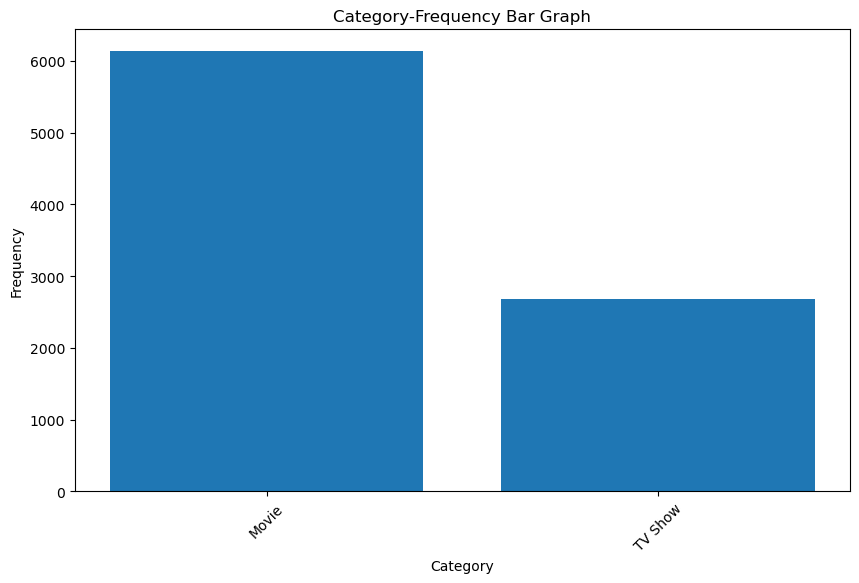

In [19]:
# 'type' Feature
plot_categorical_frequency(df["type"], "Category", "Frequency", "Category-Frequency Bar Graph")

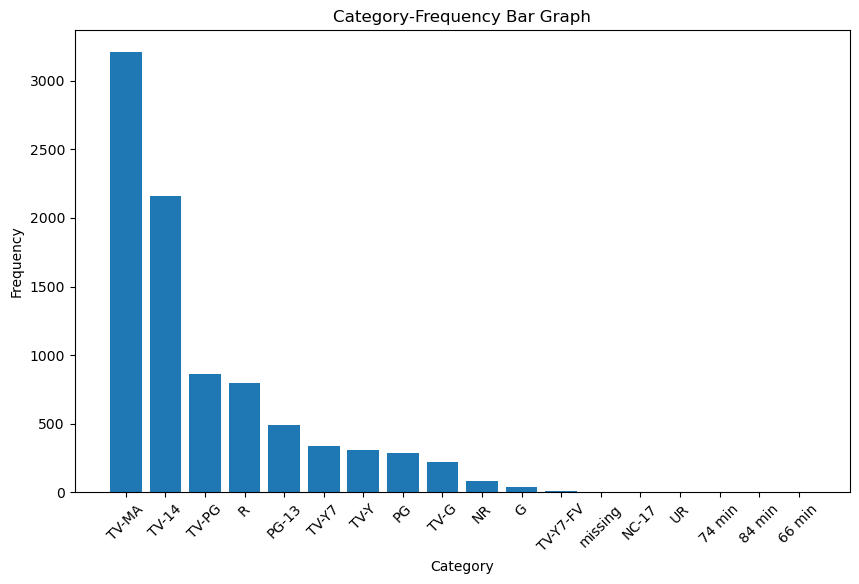

In [20]:
# 'rating' Feature
plot_categorical_frequency(df["rating"], "Category", "Frequency", "Category-Frequency Bar Graph")

with 'rating' frequency analysis we see three unwanted values entered: '74 min', '84 min', '66 min'
* We can eliminate these with turning values to 'UR'; Because UR means, *Unrated*

In [21]:
# Change '74 min', '84 min', '66 min' Values to 'UR'
df['rating'] = np.where(np.isin(df['rating'], ['74 min', '84 min', '66 min']), 'UR', df['rating'])

In [22]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


For Other Categorical Features we don't need to do Outlier analysis; because unique value count higher than 200

## EDA

#### Close look at the data in the dataset -Using groupby-

In [23]:
# Movie and Tv Shows Data Examination
# count and release_year
df.groupby("type").agg({
    "show_id": "count",     
    "release_year": ["min", "max", "mean"],
})

show_id release_year                   
          count          min   max         mean
type                                           
Movie      6131         1942  2021  2013.121514
TV Show    2676         1925  2021  2016.605755

In [24]:
# Genre count
df.groupby("listed_in").agg({
    "show_id": "count",     
}).sort_values(by="show_id", ascending=False)

,show_id
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Cult Movies, Dramas, International Movies",1
"Cult Movies, Dramas, Music & Musicals",1
"Cult Movies, Dramas, Thrillers",1


In [25]:
# Content numbers from country in Netflix,
df.groupby("country").agg({
    "show_id": "count"
}).sort_values(by="show_id", ascending=False)

,show_id
country,
United States,2818
India,972
missing,831
United Kingdom,419
Japan,245
...,...
"Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India",1
"Ireland, Canada, United Kingdom, United States",1
"Ireland, Canada, United States, United Kingdom",1


In [26]:
# Rating Counts
df.groupby("rating").agg({
    "show_id": "count"
})

,show_id
rating,
G,41
NC-17,3
NR,80
PG,287
PG-13,490
R,799
TV-14,2160
TV-G,220
TV-MA,3207


In [6]:
def parse_minutes(value):
    try:
        str_value = str(value)
        minutes = int(str_value.split(' ')[0])
        return minutes
    except (ValueError, IndexError):
        return None

df["new_duration"] = df["duration"].apply(parse_minutes)

In [7]:
df.groupby("listed_in").agg({
    "new_duration" : ["mean","sum","min","max"]
})

new_duration                       
                                                           mean      sum    min    max
listed_in                                                                             
Action & Adventure                                   104.890625  13426.0   77.0  191.0
Action & Adventure, Anime Features                    84.000000     84.0   84.0   84.0
Action & Adventure, Anime Features, Children & ...    91.750000    367.0   59.0  107.0
Action & Adventure, Anime Features, Classic Movies   119.500000    239.0  100.0  139.0
Action & Adventure, Anime Features, Horror Movies     96.000000     96.0   96.0   96.0
...                                                         ...      ...    ...    ...
TV Horror, TV Mysteries, Teen TV Shows                 1.000000      1.0    1.0    1.0
TV Horror, Teen TV Shows                               1.500000      3.0    1.0    2.0
TV Sci-Fi & Fantasy, TV Thrillers                      3.000000      3.0    3.0    3.0
TV Shows                                               1.000000     16.0    1.0    1.0
Thrillers                                             99.953846   6497.0   80.0  149.0

[514 rows x 4 columns]

In [8]:
df.groupby("country").agg({
    "new_duration" : ["mean","sum","min","max"]
})

new_duration                      
                                                           mean     sum    min    max
country                                                                              
, France, Algeria                                    103.000000   103.0  103.0  103.0
, South Korea                                          1.000000     1.0    1.0    1.0
Argentina                                             58.660714  3285.0    1.0  116.0
Argentina, Brazil, France, Poland, Germany, Den...    96.000000    96.0   96.0   96.0
Argentina, Chile                                      95.000000   190.0   78.0  112.0
...                                                         ...     ...    ...    ...
Venezuela                                            119.000000   119.0  119.0  119.0
Venezuela, Colombia                                   82.000000    82.0   82.0   82.0
Vietnam                                              106.285714   744.0   92.0  117.0
West Germany                                         150.000000   150.0  150.0  150.0
Zimbabwe                                             100.000000   100.0  100.0  100.0

[748 rows x 4 columns]

#### Story of Data

   1. Year analysis

* Content production by year

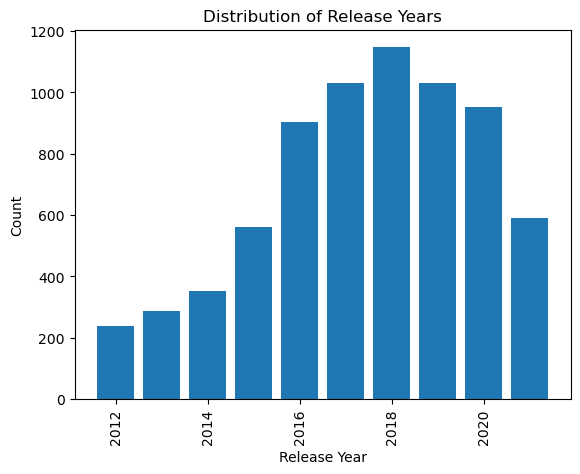

In [73]:
release_years = df['release_year']

# Count the occurrences of each release year
year_counts = release_years.value_counts()
top_years = year_counts.head(10)

# Create a bar plot
plt.bar(top_years.index, top_years.values)

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Years')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

plt.show()

* Content production by year and month

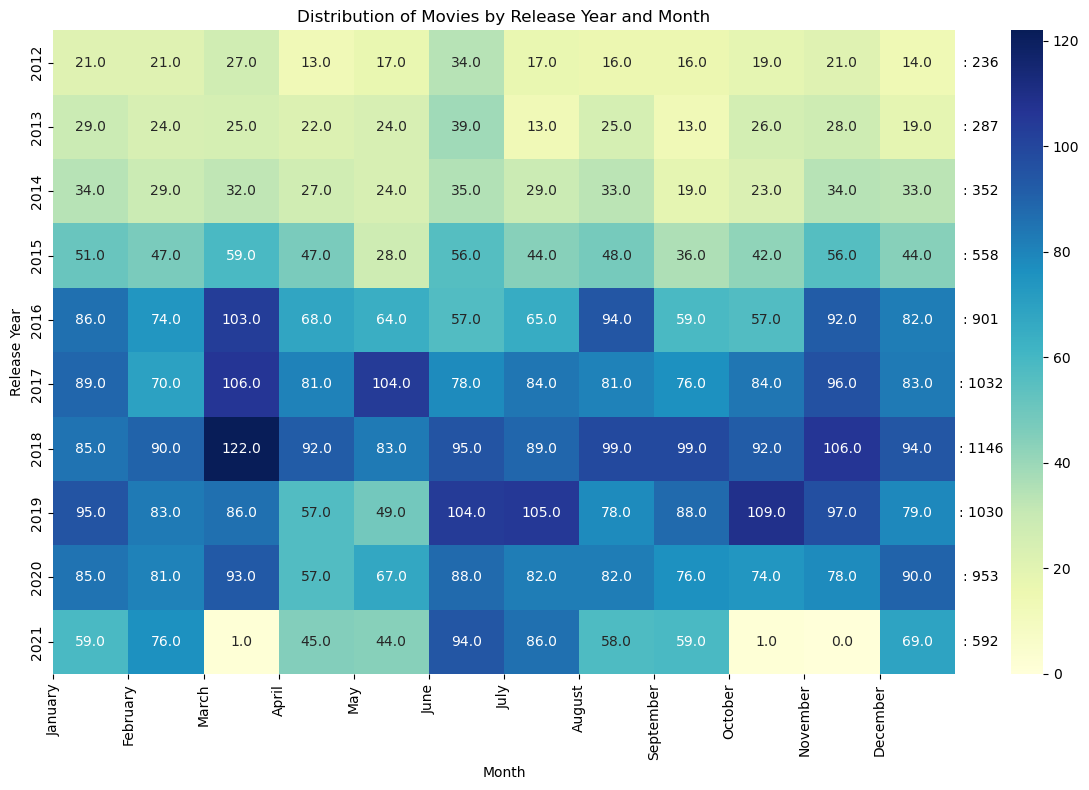

In [42]:
# Filter out rows with 'missing' in the 'date_added' column
filtered_df = df[df['date_added'] != 'missing'].copy()

filtered_df.loc[:, 'release_date'] = pd.to_datetime(filtered_df['date_added'])
filtered_df.loc[:, 'release_month'] = filtered_df['release_date'].dt.month_name()

# Count the occurrences of each release year
year_counts = filtered_df['release_year'].value_counts()

# Select the years with the most movies
top_years = year_counts.head(10).index

# Filter the data for the selected years
filtered_df = filtered_df[filtered_df['release_year'].isin(top_years)].copy()

# Count the occurrences of each release year and month combination
release_counts = filtered_df.groupby(['release_year', 'release_month']).size().unstack().fillna(0)

# Create a heatmap plot
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(release_counts, cmap='YlGnBu', annot=True, fmt=".1f")

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Release Year')
plt.title('Distribution of Contents by Release Year and Month')

# Customize x-axis tick labels to show month names
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks=range(0, 12), labels=month_labels)

# Add total count annotations for each year below the bars
for i, year in enumerate(release_counts.index):
    plt.text(12.35, i + 0.5, f': {year_counts.loc[year]}', ha='center', va='center')

# Display the plot
plt.tight_layout()
plt.show()

**Observations** 
* Most content was produced in March 2018.
* The content density of the dataset, from which we received the data, belongs to the years 2017, 2018, 2019.

2. Content Numbers by Country

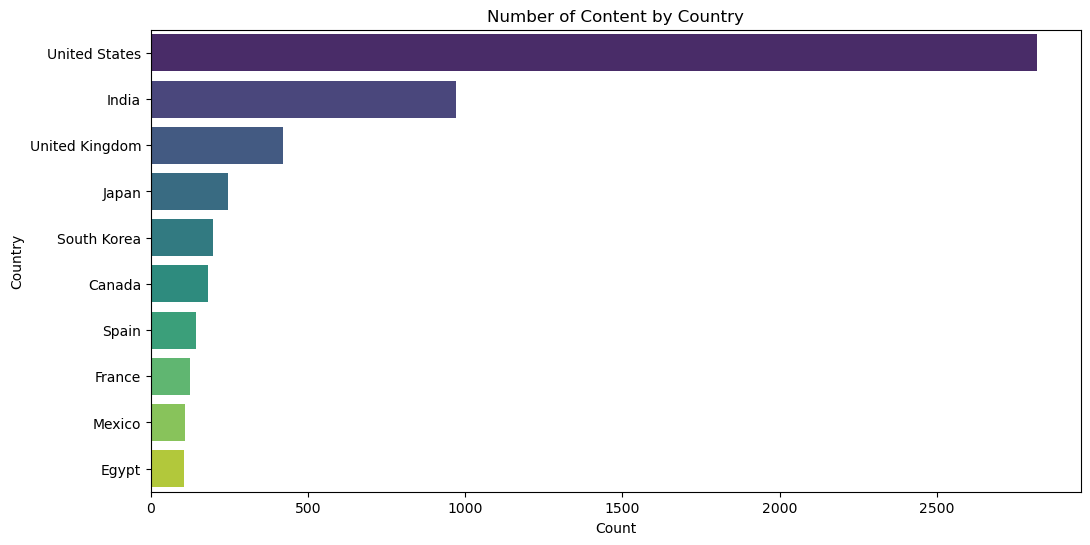

In [43]:
# Filter out rows with 'missing' in the 'country' column
filtered_df = df[df['country'] != 'missing'].copy()

# Count the occurrences of each country
country_counts = filtered_df['country'].value_counts()

# Select the top 10 countries with the most content
top_countries = country_counts.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Number of Content by Country')

# Display the plot
plt.show()

**Observations** 
* Most Content is from USA, India, and UK

3. Rating analysis

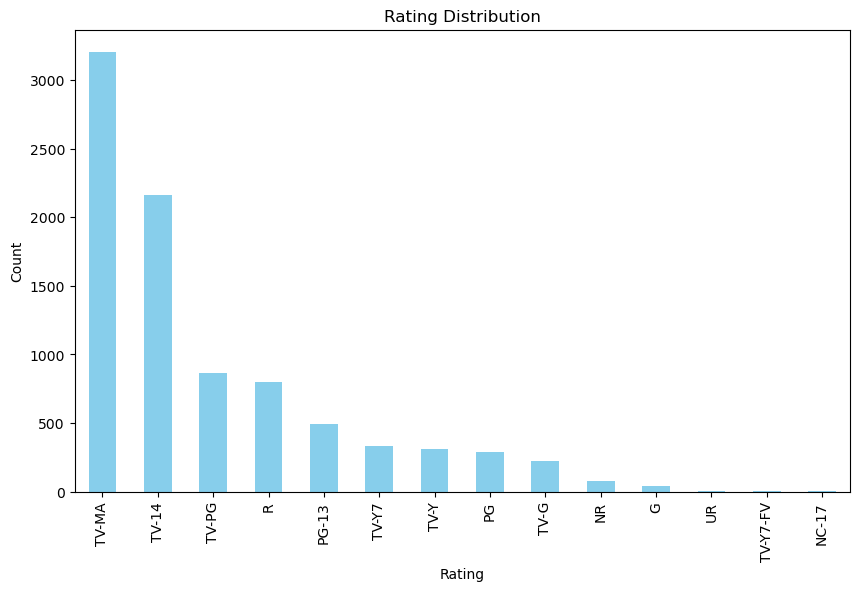

In [58]:
# Filter out rows with 'missing' in the 'rating' column
filtered_df = df[df['rating'] != 'missing'].copy()

# Count the occurrences of each rating
rating_counts = filtered_df['rating'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')

# Display the plot
plt.show()

**Observations** 
* Most used ratings TV-MA, TV-14, TV-PG is used in tv shows;
  * That means Tv shows mostly for Mature or 14+
* R rating in fourth place used in Movies;
  * That means Movies in Netflix mostly for Mature 

4. Popular Genres

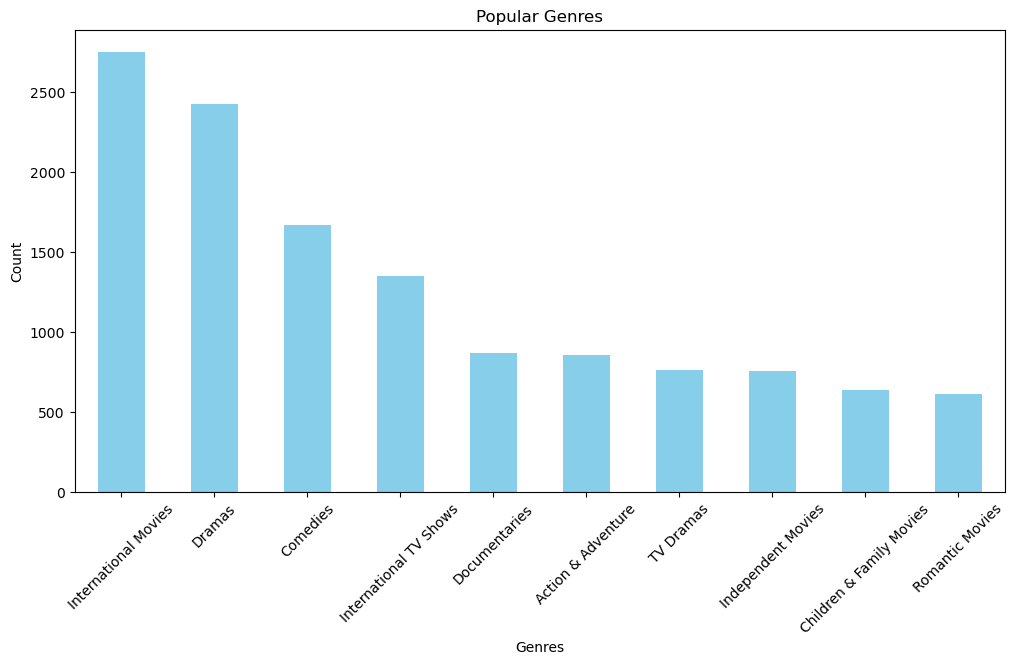

In [61]:
# Extract the genres
genres = df['listed_in'].str.split(', ').explode()

# Count the occurrences of each genre
genre_counts = genres.value_counts()

# Select the top 10 popular genres
top_genres = genre_counts.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Popular Genres')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Observations**
* Most Content in Netflix;
  * International Movies
  * Dramas
  * Comedies

5. Duration Analysis

Duration Summary Statistics:
Minimum duration: 3 min
Maximum duration: 312 min
Mean duration: 99.58 min
Median duration: 98.00 min


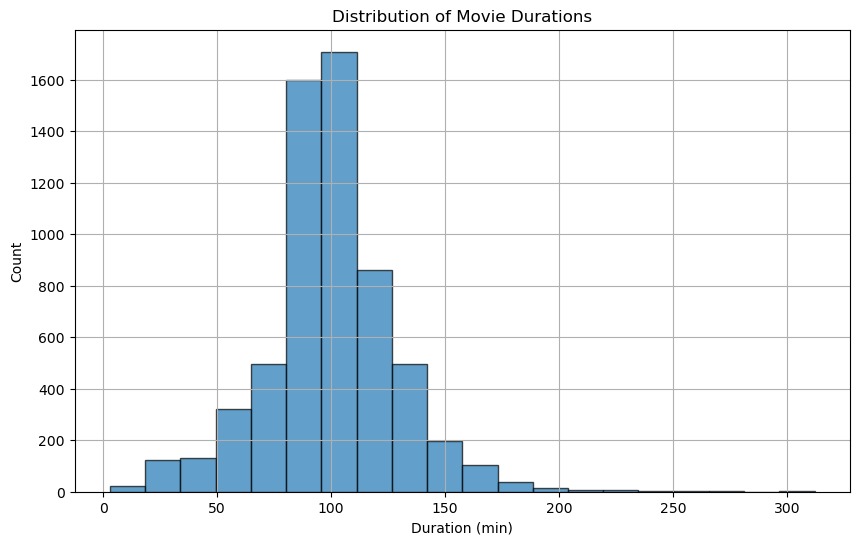

In [79]:
# Extract the movie durations without 'missing' values
movie_durations = df[(df['type'] == 'Movie') & (df['duration'] != 'missing')]['duration']

# Convert the durations to numeric values (remove 'min' suffix)
movie_durations = movie_durations.str.replace(' min', '').astype(int)

# Calculate summary statistics
min_duration = movie_durations.min()
max_duration = movie_durations.max()
mean_duration = movie_durations.mean()
median_duration = movie_durations.median()

# Print the summary statistics
print("Duration Summary Statistics:")
print("Minimum duration: {} min".format(min_duration))
print("Maximum duration: {} min".format(max_duration))
print("Mean duration: {:.2f} min".format(mean_duration))
print("Median duration: {:.2f} min".format(median_duration))

# Create a histogram of movie durations
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(movie_durations, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.title('Distribution of Movie Durations')
plt.grid(True)
plt.show()

**Observations**
* The average movie length is around 100 minutes.

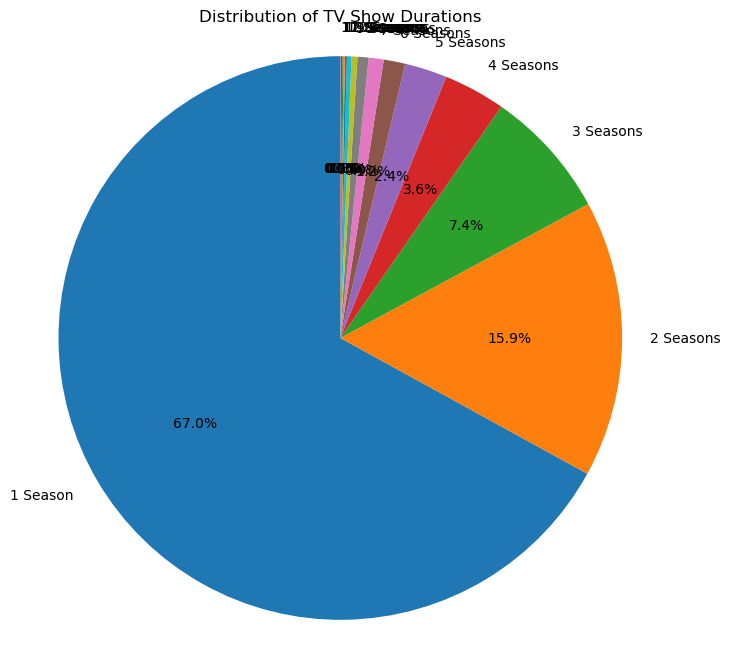

In [87]:
# Filter TV show durations without 'missing' values
tv_show_durations = df[(df['type'] == 'TV Show') & (df['duration'] != 'missing')]['duration']

# Count the occurrences of each duration
duration_counts = tv_show_durations.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TV Show Durations')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

**Observations**
* 67% of tv shows are 1 season
* Longest tv show is has 17 seasons

In [88]:
duration_counts

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

6. Word Cloud From Content Descriptions
   * Most used words in Descriptions

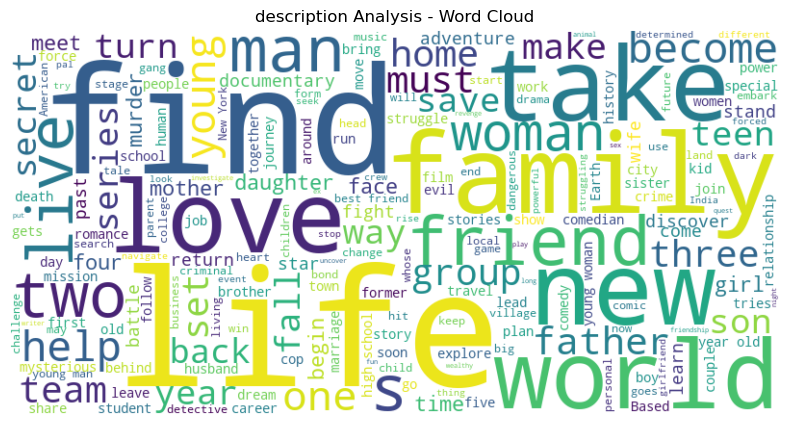

In [90]:
from wordcloud import WordCloud

# Filter out missing description values
description_data = df[df['description'] != 'missing']['description']

# Join all the cast names into a single string
description_text = ' '.join(description_data)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(description_text)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Display the word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('description Analysis - Word Cloud')
ax.axis('off')

# Show the plot
plt.show()

**Observations**
* Most used words in content descriptions
  1. life
  2. find
  3. family
  4. love
  5. new
  6. world
  7. friend
  8. live
  9. take
  10. young
  ...

## Machine Learning Modeling

1. Label Encoding
* Which Features needs Label Encoding

In [26]:
# Object Features
df.select_dtypes(include=['object']).columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'rating',
 'duration',
 'listed_in',
 'description']

In [27]:
def label_encoder(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    
    return df, le.classes_

In [28]:
# Convert all categorical columns in numerical
label_encoder(df, "show_id")
label_encoder(df, "type")
label_encoder(df, "title")
label_encoder(df, "director")
label_encoder(df, "cast")
label_encoder(df, "country")
label_encoder(df, "date_added")
label_encoder(df, "rating")
label_encoder(df, "duration")
label_encoder(df, "listed_in")
label_encoder(df, "description")

(      show_id  type  title  director  cast  country  date_added  release_year  rating  duration  listed_in  description
 0           0     0   1975      2295  7677      603        1711          2020       4       210        274         2577
 1        1111     1   1091      4516   409      426        1706          2021       8       110        414         1762
 2        2222     1   2651      2105  6296      748        1706          2021       8         0        242         7341
 3        3333     1   3506      4516  7677      748        1706          2021       8         0        297         3617
 4        4444     1   3861      4516  4815      251        1706          2021       8       110        393         4416
 ...       ...   ...    ...       ...   ...      ...         ...           ...     ...       ...        ...          ...
 8802     8671     0   8770       979  4677      603        1419          2007       5        70        269          895
 8803     8672     1   8773     

2. Linear Regression Model

In [29]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'], dtype='object')

In [30]:
# Divide the data depented and independent variable
X = df.drop('rating', axis=1)  # Independent 
y = df['rating']  # Dependent

In [31]:
# Normalize the data using the Standart Scaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [32]:
def model_linear_regression(X, y):
    # Split the data train(%80) and test (%20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

    #fit the train data to the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # mse from train
    train_predictions = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)

    # mse from test 
    test_predictions = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_predictions)

    return train_mse, test_mse

model_linear_regression(X, y)

(3.2728360639378486, 3.166668189191538)